## AmpSF schematic generator solution
The follow cell contains the solution for AmpSF schematic generator.  you should be able to evaluate it and run the flow.  Note that it uses `amp_sf_soln` schematic template instead of the `amp_sf` schematic template you meant to fill out.  If you wish to debug your schematic template, you can change `amp_sf_soln` to `amp_sf` in the `yaml_file` class variable.

using existing BagProject
computing layout
ext_w0 = 1, ext_wend=7, ytop=2880
ext_w0 = 2, ext_wend=9, ytop=3024
final: ext_w0 = 1, ext_wend=7, ytop=2880
creating layout
layout done
creating AMP_SF schematics
running lvs
Running tasks, Press Ctrl-C to cancel.
lvs passed
lvs log is /users/erichang/projects/bag_gen/BAG2_cds_ff_mpt/pvs_run/lvs_run_dir/DEMO_AMP_SF/AMP_SF/lvsLog_20180906_111315b1mh7xr5
computing AMP_SF_tb_dc schematics
creating AMP_SF_tb_dc schematics
computing AMP_SF_tb_ac_tran schematics
creating AMP_SF_tb_ac_tran schematics
schematic done
setting up AMP_SF_tb_dc
running simulation
Running tasks, Press Ctrl-C to cancel.
simulation done, load results
setting up AMP_SF_tb_ac_tran
running simulation
Running tasks, Press Ctrl-C to cancel.
simulation done, load results
all simulation done
loading simulation data for AMP_SF_tb_dc
loading simulation data for AMP_SF_tb_ac_tran
finish loading data
, gain=0.05005
, f_3db=1.124e+10, f_unity=-1, phase_margin=360


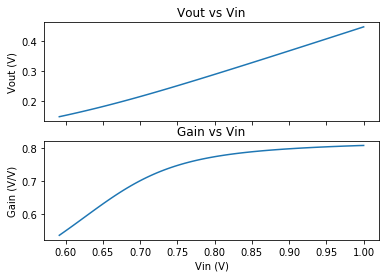

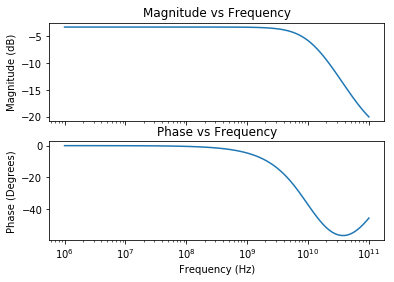

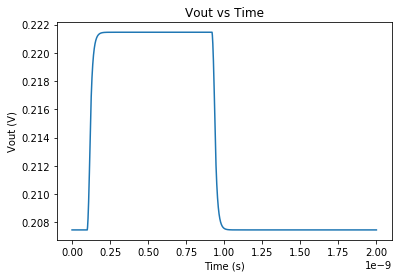

In [2]:
%matplotlib inline

import os

from bag.design import Module


# noinspection PyPep8Naming
class demo_templates__amp_sf(Module):
    """Schematic generator for a source follower.
    """

    # hard coded netlist flie path to get jupyter notebook working.
    yaml_file = os.path.join(os.environ['BAG_WORK_DIR'], 'BAG_XBase_demo', 
                             'BagModules', 'demo_templates', 'netlist_info', 'amp_sf_soln.yaml') 

    def __init__(self, bag_config, parent=None, prj=None, **kwargs):
        Module.__init__(self, bag_config, self.yaml_file, parent=parent, prj=prj, **kwargs)

    @classmethod
    def get_params_info(cls):
        return dict(
            lch='channel length in meters.',
            w_dict='Dictionary of transistor widths.',
            intent_dict='Dictionary of transistor threshold flavors.',
            fg_dict='Dictionary of transistor number of fingers.',
            dum_info='Dummy information data structure',
        )

    def design(self, lch, w_dict, intent_dict, fg_dict, dum_info):
        w_amp = w_dict['amp']
        w_bias = w_dict['bias']
        intent_amp = intent_dict['amp']
        intent_bias = intent_dict['bias']
        fg_amp = fg_dict['amp']
        fg_bias = fg_dict['bias']

        self.instances['XAMP'].design(w=w_amp, l=lch, intent=intent_amp, nf=fg_amp)
        self.instances['XBIAS'].design(w=w_bias, l=lch, intent=intent_bias, nf=fg_bias)

        # handle dummy transistors
        self.design_dummy_transistors(dum_info, 'XDUM', 'VDD', 'VSS')

        
import os

# import bag package
import bag
from bag.io import read_yaml

# import BAG demo Python modules
import xbase_demo.core as demo_core
from xbase_demo.demo_layout.core import AmpSFSoln

# load circuit specifications from file
spec_fname = os.path.join(os.environ['BAG_WORK_DIR'], 'specs_demo/demo.yaml')
top_specs = read_yaml(spec_fname)

# obtain BagProject instance
local_dict = locals()
if 'bprj' in local_dict:
    print('using existing BagProject')
    bprj = local_dict['bprj']
else:
    print('creating BagProject')
    bprj = bag.BagProject()

demo_core.run_flow(bprj, top_specs, 'amp_sf', AmpSFSoln, sch_cls=demo_templates__amp_sf, run_lvs=True)